<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part2/ch03_conditional.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 Conditional Probability

Imagine we have two events $A$ and $B$. If they are independent, then the probability that they occur together is straightforward to compute. But if $A$ and $B$ are **not independent**, then knowing that one event has occurred can have a **significant effect** on the probability the other will occur.

Here are two extreme examples:

1. If $A$ and $B$ are the **same**, then knowing that $A$ occurred means you know that $B$ occurred, too
2. If $A = B^c$, then knowing that $A$ occurred means you know that $B$ did **not** occur

---

## Worked Example 3.25: Non-Independent Events

**Problem**: You throw a fair six-sided die twice and add the numbers.

1. Compute the probability of getting a number **less than six**
2. Imagine you know that the first die came up **three**. Compute the probability the sum will be less than six
3. Imagine you know that the first die came up **four**. Compute the probability the sum will be less than six
4. Finally, imagine you know that the first die came up **one**. Compute the probability the sum will be less than six

**Solution**: 

1. The probability of getting a number less than six is $\frac{10}{36}$
2. If the first die comes up three, then the question is: what is the probability of getting a number **less than three** on the second die, which is $\frac{1}{3}$
3. If the first die comes up four, then the question is: what is the probability of getting a number **less than two** on the second die, which is $\frac{1}{6}$
4. Finally, if the first die comes up one, then the question is: what is the probability of getting a number **less than five** on the second die, which is $\frac{2}{3}$

**Notice how** knowing what happened to the first die can have a significant effect on the probability of the event!

Part 1: P(sum < 6) = 10/36 = 0.2778

Part 2: P(sum < 6 | first = 3) = 2/6 = 0.3333
Part 3: P(sum < 6 | first = 4) = 1/6 = 0.1667
Part 4: P(sum < 6 | first = 1) = 4/6 = 0.6667


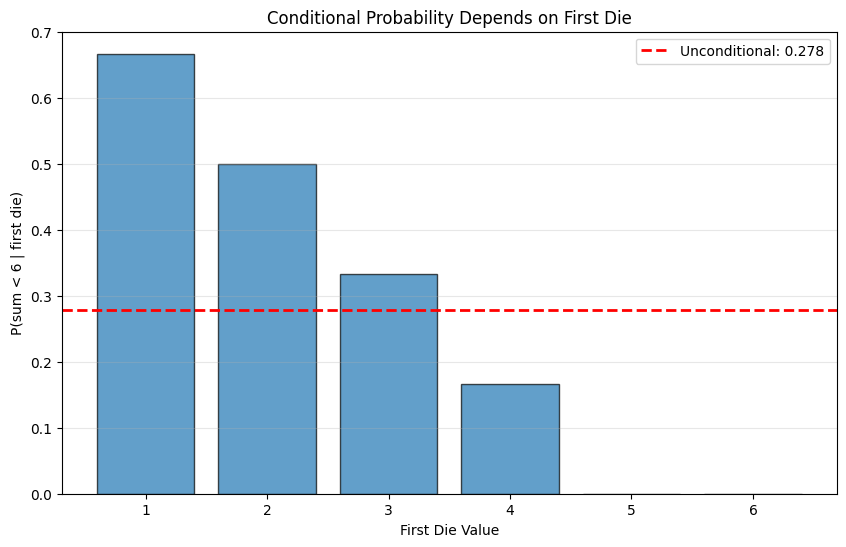

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Two dice outcomes
dice = list(product(range(1, 7), repeat=2))
sums = [d1 + d2 for d1, d2 in dice]

# Part 1: P(sum < 6)
less_than_6 = sum(1 for s in sums if s < 6)
print(f"Part 1: P(sum < 6) = {less_than_6}/36 = {less_than_6/36:.4f}")

# Part 2: P(sum < 6 | first die = 3)
first_3 = [(d1, d2, d1+d2) for d1, d2 in dice if d1 == 3]
first_3_less_6 = sum(1 for _, _, s in first_3 if s < 6)
print(f"\nPart 2: P(sum < 6 | first = 3) = {first_3_less_6}/6 = {first_3_less_6/6:.4f}")

# Part 3: P(sum < 6 | first die = 4)
first_4 = [(d1, d2, d1+d2) for d1, d2 in dice if d1 == 4]
first_4_less_6 = sum(1 for _, _, s in first_4 if s < 6)
print(f"Part 3: P(sum < 6 | first = 4) = {first_4_less_6}/6 = {first_4_less_6/6:.4f}")

# Part 4: P(sum < 6 | first die = 1)
first_1 = [(d1, d2, d1+d2) for d1, d2 in dice if d1 == 1]
first_1_less_6 = sum(1 for _, _, s in first_1 if s < 6)
print(f"Part 4: P(sum < 6 | first = 1) = {first_1_less_6}/6 = {first_1_less_6/6:.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
first_die_values = [1, 2, 3, 4, 5, 6]
cond_probs = []

for first in first_die_values:
    first_die = [(d1, d2, d1+d2) for d1, d2 in dice if d1 == first]
    less_6 = sum(1 for _, _, s in first_die if s < 6)
    cond_probs.append(less_6/6)

ax.bar(first_die_values, cond_probs, edgecolor='black', alpha=0.7)
ax.axhline(y=less_than_6/36, color='red', linestyle='--', linewidth=2, 
           label=f'Unconditional: {less_than_6/36:.3f}')
ax.set_xlabel('First Die Value')
ax.set_ylabel('P(sum < 6 | first die)')
ax.set_title('Conditional Probability Depends on First Die')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.show()

---

## Definition 3.4: Conditional Probability

We assume we have a space of outcomes $\Omega$ and a collection of events. The **conditional probability** of $B$, conditioned on $A$, is the probability that $B$ occurs given that $A$ has definitely occurred. We write this as:

$$P(B|A)$$

From the examples, it should be clear to you that for some cases $P(B|A)$ is the same as $P(B)$, and for other cases it is not.

---

## 3.4.1 Evaluating Conditional Probabilities

To get an expression for $P(B|A)$, notice that, because $A$ is known to have occurred, our space of outcomes (or sample space) is now **reduced to $A$**.

We know that our outcome lies in $A$. $P(B|A)$ is the probability that it also lies in $B \cap A$.

The outcome lies in $A$, and so it must lie in either $B \cap A$ or in $B^c \cap A$, and it cannot lie in both. This means:

$$P(B|A) + P(B^c|A) = 1$$

### Derivation

Now recall the idea of probabilities as **relative frequencies**. If $P(C \cap A) = kP(B \cap A)$, this means that outcomes in $C \cap A$ will appear $k$ times as often as outcomes in $B \cap A$. But this must apply even if we know in advance that the outcome is in $A$.

This means that, if $P(C \cap A) = kP(B \cap A)$, then $P(C|A) = kP(B|A)$.

In turn, we must have:
$$P(B|A) \propto P(B \cap A)$$

Now we need to determine the constant of proportionality (write $c$ for this constant), meaning:
$$P(B|A) = cP(B \cap A)$$

We have that:
$$P(B|A) + P(B^c|A) = cP(B \cap A) + cP(B^c \cap A) = cP(A) = 1$$

so that:

$$\boxed{P(B|A) = \frac{P(B \cap A)}{P(A)}}$$

### The Size Metaphor

I find the **size metaphor** helpful here. We have that $P(B|A)$ measures the probability that an outcome is in $B$, given we know it is in $A$. 

From the size perspective, $P(B|A)$ measures the **size of $(A \cap B)$ relative to $A$**. So our expression makes sense, because the **fraction** of the event $A$ that is also part of the event $B$ is given by the size of the intersection divided by the size of $A$.

---

## Useful Facts 3.3: Conditional Probability Formulas

### Formula 1: Basic Definition
$$P(B|A) = \frac{P(A \cap B)}{P(A)}$$

### Formula 2: Multiplication Rule
Another, very useful, way to write the expression is:
$$P(B|A)P(A) = P(B \cap A)$$

Now, since $B \cap A = A \cap B$, we must have:

$$\boxed{P(B|A) = \frac{P(A|B)P(B)}{P(A)}}$$

This is **Bayes' rule** (or Bayes' theorem).

### Formula 3: Law of Total Probability

Notice that $A$ and $A^c$ are disjoint sets, and that $B = (B \cap A) \cup (B \cap A^c)$. So, because $P(B) = P(B \cap A) + P(B \cap A^c)$, we have:

$$\boxed{P(B) = P(B|A)P(A) + P(B|A^c)P(A^c)}$$

Assum we have a collection of disjoint sets $B_i$. These sets must have the property that:
- (a) $B_i \cap B_j = \emptyset$ for $i \neq j$ and
- (b) they cover $A$, meaning that $A \cap (\bigcup_i B_i) = A$

Then, because $P(A) = \sum_i P(A \cap B_i)$, so we have:

$$\boxed{P(A) = \sum_i P(A|B_i)P(B_i)}$$

```{admonition} Remember This
:class: warning
Here is one helpful example. If you buy a lottery ticket $L$, the probability of winning $W$ is small. So $P(W|L)$ may be very small. But $P(L|W) = 1$—the winner is always someone who bought a ticket!


---

## Worked Examples: Bayes' Rule

### Worked Example 3.26: Car Factories

**Problem**: There are two car factories, A and B:
- Factory A produces **1000 cars** per year, of which **10 are lemons**
- Factory B produces **2 cars**, each of which is a **lemon**

All cars go to a single lot, where they are thoroughly mixed up. I buy a car.

1. What is the probability it is a lemon?
2. What is the probability it came from factory B?
3. The car is now revealed to be a lemon. What is the probability it came from factory B, conditioned on the fact it is a lemon?

**Solution**: Write $L$ for the event "the car is a lemon".

There are 1002 cars total, of which 12 are lemons. The probability that I select any given car is the same, so:

1. $P(L) = \frac{12}{1002}$
2. $P(B) = \frac{2}{1002}$
3. Write $B$ for the event "the car comes from factory B". I need:

$$P(B|L) = \frac{P(L \cap B)}{P(L)} = \frac{P(L|B)P(B)}{P(L)}$$

I have:
$$P(L|B)P(B) = (1) \cdot \frac{2}{1002}$$

So:
$$P(B|L) = \frac{2/1002}{12/1002} = \frac{2}{12} = \frac{1}{6}$$

In [2]:
# Car factories example
total_cars = 1002
factory_a_cars = 1000
factory_a_lemons = 10
factory_b_cars = 2
factory_b_lemons = 2

total_lemons = factory_a_lemons + factory_b_lemons

P_L = total_lemons / total_cars
P_B = factory_b_cars / total_cars
P_L_given_B = factory_b_lemons / factory_b_cars  # All from B are lemons
P_B_given_L = (P_L_given_B * P_B) / P_L

print("Car Factories:")
print(f"  P(lemon) = {total_lemons}/{total_cars} = {P_L:.4f}")
print(f"  P(from B) = {factory_b_cars}/{total_cars} = {P_B:.4f}")
print(f"  P(from B | lemon) = {P_B_given_L:.4f} = 1/{int(1/P_B_given_L)}")
print(f"\nInterpretation: {P_B_given_L:.1%} of lemons are from factory B")

Car Factories:
  P(lemon) = 12/1002 = 0.0120
  P(from B) = 2/1002 = 0.0020
  P(from B | lemon) = 0.1667 = 1/6

Interpretation: 16.7% of lemons are from factory B



---

### Worked Example 3.27-3.29: Royal Flushes in Poker

#### Example 3.27: Royal Flushes in Poker1

**Problem**: You are playing poker where you are dealt five cards face down. A royal flush is a hand of **AKQJ10 all in one suit**. What is the probability that you are dealt a royal flush?

**Solution**: 
$$P(\text{royal flush}) = \frac{\text{number of royal flush hands}}{\text{total number of 5-card hands}}$$

There are **four** hands that are royal flushes (one for each suit). The total number of five-card hands is:

$$\binom{52}{5} = 2,598,960$$

So:
$$P(\text{royal flush}) = \frac{4}{2,598,960} = \frac{1}{649,740}$$

#### Example 3.28: Royal Flushes in Poker2

**Problem**: The fifth card that you are dealt lands **face up**. What is the conditional probability of getting a royal flush, conditioned on the event that this card is the **nine of spades**?

**Solution**: No hand containing a nine of spades is a royal flush, so this is easily **zero**.

#### Example 3.29: Royal Flushes in Poker3

**Problem**: The fifth card lands face up. It is the **Ace of spades**. What now is the probability that you have been dealt a royal flush?

**Solution**: Now consider the events:
- $A$ = "you get a royal flush and the last card is the ace of spades"
- $B$ = "the last card you get is the ace of spades"

We want:
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Now $P(B) = \frac{1}{52}$. 

$P(A \cap B)$ is given by:
$$\frac{\text{number of 5-card royal flushes where card 5 is Ace of spades}}{\text{total number of different 5-card hands}}$$

This is:
$$\frac{4 \cdot 3 \cdot 2 \cdot 1}{52 \cdot 51 \cdot 50 \cdot 49 \cdot 48}$$

yielding:
$$P(A|B) = \frac{1}{249,900}$$

**Notice the interesting part**: seeing this card has **really made a difference**!

In [3]:
from scipy.special import comb

# Royal flush probabilities
total_hands = comb(52, 5, exact=True)
print(f"Total 5-card hands: {total_hands:,}\n")

# Example 3.27
royal_flush_hands = 4
prob_royal = royal_flush_hands / total_hands
print(f"Example 3.27: P(royal flush) = {royal_flush_hands}/{total_hands:,}")
print(f"            = 1/{total_hands//royal_flush_hands:,} = {prob_royal:.8f}\n")

# Example 3.28
print(f"Example 3.28: P(royal flush | 9♠) = 0 (impossible)\n")

# Example 3.29
P_B = 1/52
# Only 1 way to complete royal flush in spades with A♠ as 5th card
P_A_and_B = (4*3*2*1) / (52*51*50*49*48)
P_A_given_B = P_A_and_B / P_B

print(f"Example 3.29: P(royal flush | A♠ is last card)")
print(f"            = {P_A_given_B:.8f} = 1/{int(1/P_A_given_B):,}")
print(f"\nSeeing the A♠ increases probability by factor of {(1/P_A_given_B)/(total_hands/4):.1f}!")

Total 5-card hands: 2,598,960

Example 3.27: P(royal flush) = 4/2,598,960
            = 1/649,740 = 0.00000154

Example 3.28: P(royal flush | 9♠) = 0 (impossible)

Example 3.29: P(royal flush | A♠ is last card)
            = 0.00000400 = 1/249,900

Seeing the A♠ increases probability by factor of 0.4!



---

### Worked Example 3.30: Two Dice

**Problem**: We throw two fair six-sided dice. What is the conditional probability that the sum of spots on both dice is **greater than six**, conditioned on the event that the first die comes up **five**?

**Solution**: Write $F$ for the event "the first die comes up 5", and $S$ for the event "the sum is greater than six".

There are **five outcomes** where the first die comes up 5 and the number is greater than 6:
$(5,2), (5,3), (5,4), (5,5), (5,6)$

So $P(F \cap S) = \frac{5}{36}$.

Now:
$$P(S|F) = \frac{P(F \cap S)}{P(F)} = \frac{5/36}{1/6} = \frac{5}{6}$$

In [4]:
# Two dice conditional probability
first_5 = [(5, i) for i in range(1, 7)]
first_5_sum_gt_6 = [(5, i) for i in range(1, 7) if 5+i > 6]

P_F = len(first_5) / 36
P_F_and_S = len(first_5_sum_gt_6) / 36
P_S_given_F = P_F_and_S / P_F

print(f"First die = 5: {first_5}")
print(f"First die = 5 AND sum > 6: {first_5_sum_gt_6}")
print(f"\nP(sum > 6 | first = 5) = {P_S_given_F:.4f} = {int(P_S_given_F*6)}/6")

First die = 5: [(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]
First die = 5 AND sum > 6: [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]

P(sum > 6 | first = 5) = 0.8333 = 5/6



---

## 3.4.2 Detecting Rare Events Is Hard

It is **hard to detect rare events**. This nuisance is exposed by conditional probability reasoning. The issue comes up again and again in discussions of **screening tests** for diseases.

Two recent important controversies have been around:
- Whether screening mammograms are a good idea
- Whether screening for prostate cancer is a good idea

**There is an important issue here**: There are real **harms** that occur when a test falsely labels a patient as ill:
1. The patient is distressed and frightened
2. Necessary medical interventions might be quite unpleasant and dangerous

This means it takes thought to tell whether screening does more **good** by finding and helping sick people than **harm** by frightening and hurting well people.

---

### Worked Example 3.31: False Positives

**Problem**: You have a blood test for a rare disease that occurs by chance in **1 person in 100,000**. 

- If you have the disease, the test will report that you do with probability **0.95** (sensitivity)
- If you do not have the disease, the test will report a false positive with probability **0.001**

If the test says you do have the disease, what is the probability that you actually have the disease?

**Solution**: Write $S$ for the event "you are sick" and $R$ for the event "the test reports you are sick". We need $P(S|R)$.

$$P(S|R) = \frac{P(R|S)P(S)}{P(R)} = \frac{P(R|S)P(S)}{P(R|S)P(S) + P(R|S^c)P(S^c)}$$

$$= \frac{0.95 \times 10^{-5}}{0.95 \times 10^{-5} + 10^{-3} \times (1-10^{-5})} = 0.0094$$

which should strike you as being **a bit alarming**!

**Notice what is happening here**: There are two ways that the test could come back positive:
1. You have the disease, OR
2. The test is producing a false positive

But the disease is so rare that it's **much more likely** you have a false positive result than you have the disease.

Rare Disease Test (1 in 100,000):
  Prevalence: 0.00001 (0.0%)
  Sensitivity: 0.95 (95%)
  False positive rate: 0.001 (0.1%)

  P(disease | positive test) = 0.0094 (0.94%)

  Only 0.9% chance of having disease despite positive test!


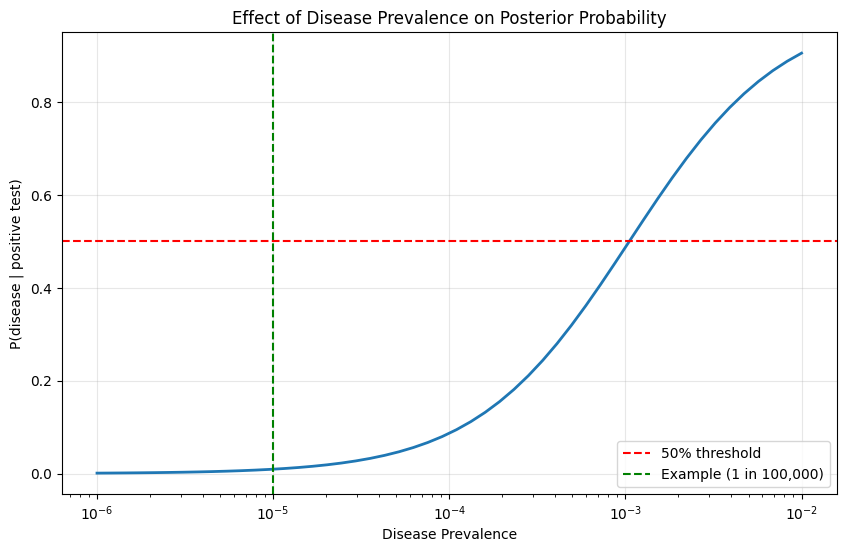

In [5]:
# False positives for rare disease
def bayes_medical_test(prevalence, sensitivity, false_positive_rate):
    """
    Calculate P(disease | positive test) using Bayes' theorem
    """
    P_S = prevalence
    P_R_given_S = sensitivity
    P_R_given_not_S = false_positive_rate
    P_not_S = 1 - P_S
    
    # P(R) = P(R|S)P(S) + P(R|¬S)P(¬S)
    P_R = P_R_given_S * P_S + P_R_given_not_S * P_not_S
    
    # P(S|R) = P(R|S)P(S) / P(R)
    P_S_given_R = (P_R_given_S * P_S) / P_R
    
    return P_S_given_R

# Example 3.31
prevalence = 1e-5
sensitivity = 0.95
fpr = 1e-3

result = bayes_medical_test(prevalence, sensitivity, fpr)

print("Rare Disease Test (1 in 100,000):")
print(f"  Prevalence: {prevalence:.5f} ({prevalence:.1%})")
print(f"  Sensitivity: {sensitivity} ({sensitivity:.0%})")
print(f"  False positive rate: {fpr} ({fpr:.1%})")
print(f"\n  P(disease | positive test) = {result:.4f} ({result:.2%})")
print(f"\n  Only {result:.1%} chance of having disease despite positive test!")

# Visualize effect of prevalence
prevalences = np.logspace(-6, -2, 50)
post_probs = [bayes_medical_test(p, sensitivity, fpr) for p in prevalences]

plt.figure(figsize=(10, 6))
plt.semilogx(prevalences, post_probs, linewidth=2)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% threshold')
plt.axvline(x=1e-5, color='green', linestyle='--', label='Example (1 in 100,000)')
plt.xlabel('Disease Prevalence')
plt.ylabel('P(disease | positive test)')
plt.title('Effect of Disease Prevalence on Posterior Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

{admonition} Important
:class: warning
If you want to be strongly confident you have detected a very rare event, you need an **extremely accurate detector**. The degree of accuracy required is often well beyond anything current technologies can reach. You should remember this example the next time someone tells you their test is, say, "90% accurate"—such a test could also be completely useless!


---

### Worked Example 3.32: False Positives 2

**Problem**: You want to design a blood test for a rare disease that occurs in **1 person in 100,000**.

- If you have the disease, test reports positive with probability $p$
- If you do not have the disease, test reports false positive with probability $q$

You want to choose the value of $p$ so that if the test says you have the disease, there is at least a **50% probability** that you do.

**Solution**: Write $S$ for "you are sick" and $R$ for "test reports you are sick". We need:

$$P(S|R) = \frac{p \times 10^{-5}}{p \times 10^{-5} + q \times (1 - 10^{-5})} \geq 0.5$$

which means:
$$p \geq 99,999q$$

which should strike you as being **very alarming indeed**, because $p \leq 1$ and $q \geq 0$.

One plausible pair of values is $q = 10^{-5}$, $p = 1 - 10^{-5}$. **The test has to be spectacularly accurate to be of any use.**

In [6]:
# Required test accuracy
prevalence = 1e-5
target_posterior = 0.5

# Try different false positive rates
fprs = [1e-3, 1e-4, 1e-5, 1e-6]

print("Required sensitivity for P(disease | +test) ≥ 50%:\n")
for fpr in fprs:
    # Solve: p / (p + fpr * (1-prevalence) / prevalence) >= 0.5
    # p >= 0.5 * fpr * (1-prevalence) / prevalence
    # For p=1: need fpr * (1-prevalence) / prevalence <= 1
    required_p = (fpr * (1 - prevalence)) / prevalence
    
    print(f"  FPR = {fpr:.0e}: need p ≥ {required_p:.1f}")
    if required_p > 1:
        print(f"    → IMPOSSIBLE (need p > 1!)")
    else:
        print(f"    → Possible with sensitivity ≥ {required_p:.5f}")

Required sensitivity for P(disease | +test) ≥ 50%:

  FPR = 1e-03: need p ≥ 100.0
    → IMPOSSIBLE (need p > 1!)
  FPR = 1e-04: need p ≥ 10.0
    → IMPOSSIBLE (need p > 1!)
  FPR = 1e-05: need p ≥ 1.0
    → Possible with sensitivity ≥ 0.99999
  FPR = 1e-06: need p ≥ 0.1
    → Possible with sensitivity ≥ 0.10000



---

## 3.4.3 Conditional Probability and Independence

Two events are independent if:
$$P(A \cap B) = P(A)P(B)$$

In turn, if two events $A$ and $B$ are independent, then:
$$P(A|B) = P(A) \text{ and } P(B|A) = P(B)$$

This means that **knowing that $A$ occurred tells you nothing about $B$**—the probability that $B$ will occur is the same whether you know that $A$ occurred or not.

---

## 3.4.4 Warning Example: The Prosecutor's Fallacy

Treat conditional probability with **great care**, because the topic confuses a lot of people, even people you might expect not to be confused.

One important mistake is the **prosecutor's fallacy**, which has a name because it's such a common error.

A prosecutor has evidence $E$ against a suspect. Write $I$ for the event that the suspect is innocent. Things get interesting when $P(E|I)$ is small. The prosecutor argues, **incorrectly**, that the suspect must be guilty, because $P(E|I)$ is so small.

**The argument is incorrect** because $P(E|I)$ is **irrelevant** to the issue. What matters is $P(I|E)$, which is the probability you are innocent, given the evidence.

The distinction is very important, because $P(I|E)$ could be big even if $P(E|I)$ is small. In the expression:

$$P(I|E) = \frac{P(E|I)P(I)}{P(E)} = \frac{P(E|I)P(I)}{P(E|I)P(I) + P(E|I^c)(1-P(I))}$$

notice that if $P(I)$ is large or if $P(E|I^c)$ is much smaller than $P(E|I)$, then $P(I|E)$ could be close to one even if $P(E|I)$ is small.

### Sally Clark Case

The prosecutor's fallacy has contributed to a variety of **miscarriages of justice**, with real, and shocking, consequences. One famous incident occurred in the UK, involving a mother, **Sally Clark**, who was convicted of murdering two of her children. Expert evidence argued that the probability of both deaths resulting from Sudden Infant Death Syndrome was extremely small.

This prompted a great deal of controversy. A second appeal on other grounds followed, and was successful. Clark never recovered from this horrific set of events and died in tragic circumstances shortly after the second appeal.

{admonition} Remember This
:class: danger
You need to be careful reasoning about conditional probability and about independent events. These topics mislead intuition so regularly that some errors have names. **Be very careful.**

There is a very significant difference between the meaning of $P(E|I)$ and the meaning of $P(I|E)$. When you use conditional probabilities, you need to be sure which one is important to you.


---

## 3.4.5 Warning Example: The Monty Hall Problem

There are **three doors**:
- Behind one is a **car**
- Behind each of the others is a **goat**

The car and goats are placed randomly and fairly, so the probability that there is a car behind each door is the same.

You will get the object that lies behind the door you choose at the end of the game. The goats are interchangeable, and, for reasons of your own, you would prefer the car to a goat.

### The Game

1. You select a door
2. The host then opens a door and shows you a **goat**
3. You must now choose to either **keep your door**, or **switch** to the other door

**What should you do?**

This problem is known as the **Monty Hall problem**, and is a relatively simple exercise in conditional probability. But careless thinking about probability can cause wonderful confusion.

### The Answer Depends on the Host's Rule!

Notice that you **cannot tell what to do** using the information provided. Label the door you choose 1, and write:
- $C_m$ for the event "there is a car behind door $m$"
- $G_m$ for the event "the host shows a goat behind door $m$"
- $r_n$ for "the host uses rule $n$"

You want to know $P(C_1|G_m r_n)$, and you do not know $P(G_m|C_1)$, $P(G_m|C_2)$, $P(G_m|C_3)$, because you don't know the **rule** by which the host chooses which door to open to reveal a goat.

**Different rules lead to quite different analyses!**

Here are some possible rules:
- **Rule 1**: choose a door uniformly at random
- **Rule 2**: choose from the doors with goats behind them that are not door 1, uniformly and at random
- **Rule 3**: if the car is at 1, then choose 2; if at 2, choose 3; if at 3, choose 1
- **Rule 4**: choose from the doors with goats behind them uniformly and at random

---

### Worked Example 3.35: Monty Hall, Rule One

**Problem**: Assume the host uses **rule one**, and shows you a goat behind door two. What is $P(C_1|G_2, r_1)$?

**Solution**: To work this out, we need:
- $P(G_2|C_1, r_1)$
- $P(G_2|C_2, r_1)$ 
- $P(G_2|C_3, r_1)$

Now $P(G_2|C_2, r_1)$ must be **zero**, because the host could not reveal a goat behind door two if there was a car behind that door.

Write $O_2$ for "the host chooses to open door two", and $B_2$ for "there happens to be a goat behind door two". These two events are **independent**—the host chose the door uniformly at random.

$$P(G_2|C_1, r_1) = P(O_2 \cap B_2|C_1, r_1) = P(O_2|C_1, r_1)P(B_2|C_1, r_1) = \left(\frac{1}{3}\right)(1) = \frac{1}{3}$$

where $P(B_2|C_1, r_1) = 1$ because we conditioned on the fact there was a car behind door one, so there is a goat behind each other door.

This argument establishes $P(G_2|C_3, r_1) = \frac{1}{3}$, too.

So:
$$P(C_1|G_2, r_1) = \frac{1}{2}$$

**The host showing you the goat does not motivate you to do anything**, because if $P(C_1|G_2, r_1) = \frac{1}{2}$, then $P(C_3|G_2, r_1) = \frac{1}{2}$, too—there's nothing to choose between the two closed doors.

---

### Worked Example 3.36: Monty Hall, Rule Two

**Problem**: Assume the host uses **rule two**, and shows you a goat behind door two. What is $P(C_1|G_2, r_2)$?

**Solution**: To work this out, we need:
- $P(G_2|C_1, r_2)$
- $P(G_2|C_2, r_2)$
- $P(G_2|C_3, r_2)$

Now:
- $P(G_2|C_2, r_2) = 0$ (host chooses from doors with goats)
- $P(G_2|C_1, r_2) = \frac{1}{2}$ (host chooses uniformly from doors with goats that are not door one; if car is behind door one, there are two such doors)
- $P(G_2|C_3, r_2) = 1$ (there is only one door that has a goat behind it and isn't door one)

Plug these numbers into the formula:

$$P(C_1|G_2, r_2) = \frac{P(G_2|C_1, r_2)P(C_1)}{P(G_2|C_1, r_2)P(C_1) + P(G_2|C_2, r_2)P(C_2) + P(G_2|C_3, r_2)P(C_3)}$$

$$= \frac{(1/2)(1/3)}{(1/2)(1/3) + 0 + 1(1/3)} = \frac{1/6}{1/6 + 1/3} = \frac{1}{3}$$

**This is the source of all the fuss.** It says that, if you know the host is using rule two, you should **switch doors** if the host shows you a goat behind door two because $P(C_3|G_2, r_2) = \frac{2}{3}$.

**Notice what is happening**: If the car is behind door three, then the only choice of goat for the host is the goat behind two. So by choosing a door under rule two, the host is **signalling some information** to you, which you can use.

In [7]:
# Monty Hall simulation
import random

def monty_hall_simulation(n_trials, switch=True, host_rule='rule2'):
    """
    Simulate Monty Hall problem with different host rules
    
    host_rule options:
    - 'rule1': Choose any door uniformly at random (may reveal car!)
    - 'rule2': Choose from goat doors not picked by player
    - 'rule4': Choose from all goat doors uniformly
    """
    wins = 0
    
    for _ in range(n_trials):
        # Setup
        car = random.randint(1, 3)
        choice = 1  # Always choose door 1
        
        # Host opens a door
        if host_rule == 'rule1':
            host_opens = random.choice([2, 3])
        elif host_rule == 'rule2':
            # Choose from goat doors excluding player's choice
            goat_doors = {2, 3}
            if car in goat_doors:
                goat_doors.remove(car)
            host_opens = random.choice(list(goat_doors))
        elif host_rule == 'rule4':
            # Choose from all goat doors
            goat_doors = {1, 2, 3} - {car}
            host_opens = random.choice(list(goat_doors))
        
        # Switch or stay
        if switch:
            remaining = {1, 2, 3} - {choice, host_opens}
            choice = remaining.pop()
        
        if choice == car:
            wins += 1
    
    return wins / n_trials

# Simulate different scenarios
n = 100000
print("Monty Hall Simulation (100,000 trials):\n")

for rule in ['rule1', 'rule2']:
    prob_win_stay = monty_hall_simulation(n, switch=False, host_rule=rule)
    prob_win_switch = monty_hall_simulation(n, switch=True, host_rule=rule)
    
    print(f"{rule}:")
    print(f"  Stay:   {prob_win_stay:.4f}")
    print(f"  Switch: {prob_win_switch:.4f}")
    print(f"  Advantage: {prob_win_switch/prob_win_stay:.2f}x\n")

Monty Hall Simulation (100,000 trials):

rule1:
  Stay:   0.3314
  Switch: 0.3308
  Advantage: 1.00x

rule2:
  Stay:   0.3339
  Switch: 0.6671
  Advantage: 2.00x




---

## Summary

### Key Concepts

1. **Conditional probability**: $P(B|A) = \frac{P(A \cap B)}{P(A)}$
2. **Bayes' rule**: $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$
3. **Law of total probability**: $P(A) = \sum_i P(A|B_i)P(B_i)$
4. **Rare event detection is hard**: Base rates matter!
5. **Prosecutor's fallacy**: Don't confuse $P(E|I)$ with $P(I|E)$
6. **Monty Hall**: The answer depends on the host's strategy

### Important Formulas

| Formula | Use |
|---------|-----|
| $P(B|A) = \frac{P(A \cap B)}{P(A)}$ | Definition of conditional probability |
| $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$ | Bayes' rule |
| $P(A \cap B) = P(A|B)P(B)$ | Multiplication rule |
| $P(A) = P(A|B)P(B) + P(A|B^c)P(B^c)$ | Law of total probability |
| $P(A|B) = P(A)$ | Independence |

---

## Practice Problems

1. **Medical test**: Disease prevalence 0.01, sensitivity 0.99, specificity 0.95. Find $P(\text{disease} | +\text{test})$.

2. **Cards**: Draw 2 cards without replacement. Given first is Ace, what is $P(\text{second is King})$?

3. **Monty Hall variant**: 4 doors, host opens 2 goat doors. Should you switch?

4. **Prosecutor's fallacy**: DNA match 1 in 1M, city has 8M people. Explain the fallacy.

5. **Spam filter**: $P(\text{spam}) = 0.3$, $P(\text{"free"}|\text{spam}) = 0.8$, $P(\text{"free"}|\text{not spam}) = 0.1$. Find $P(\text{spam}|\text{"free"})$.

---

→ Next: [Chapter 4: Random Variables](../part2/chapter04.md)

→ Return to [Chapter 3 Overview](chapter03.md)

---

**Key Takeaway**: Conditional probability is powerful but counterintuitive. Always ask: "Which conditional probability do I actually need?" Don't confuse $P(A|B)$ with $P(B|A)$!